In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

%load_ext autoreload
%autoreload 2


## Neuron Ablation

Neuron count 2: Mean=50.00%, SD=0.00% from 5 samples
Neuron count 3: Mean=78.02%, SD=0.57% from 5 samples
Neuron count 4: Mean=72.11%, SD=1.56% from 5 samples
Neuron count 5: Mean=79.10%, SD=1.31% from 5 samples
Neuron count 6: Mean=69.01%, SD=1.82% from 5 samples
Neuron count 7: Mean=74.39%, SD=2.23% from 5 samples
Neuron count 8: Mean=74.86%, SD=2.15% from 5 samples
Neuron count 9: Mean=69.19%, SD=1.25% from 5 samples
Neuron count 10: Mean=73.63%, SD=2.06% from 5 samples


/var/folders/g4/b0tp89t57dbbzgsx2sl8tcq00000gn/T/ipykernel_74637/2041618186.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


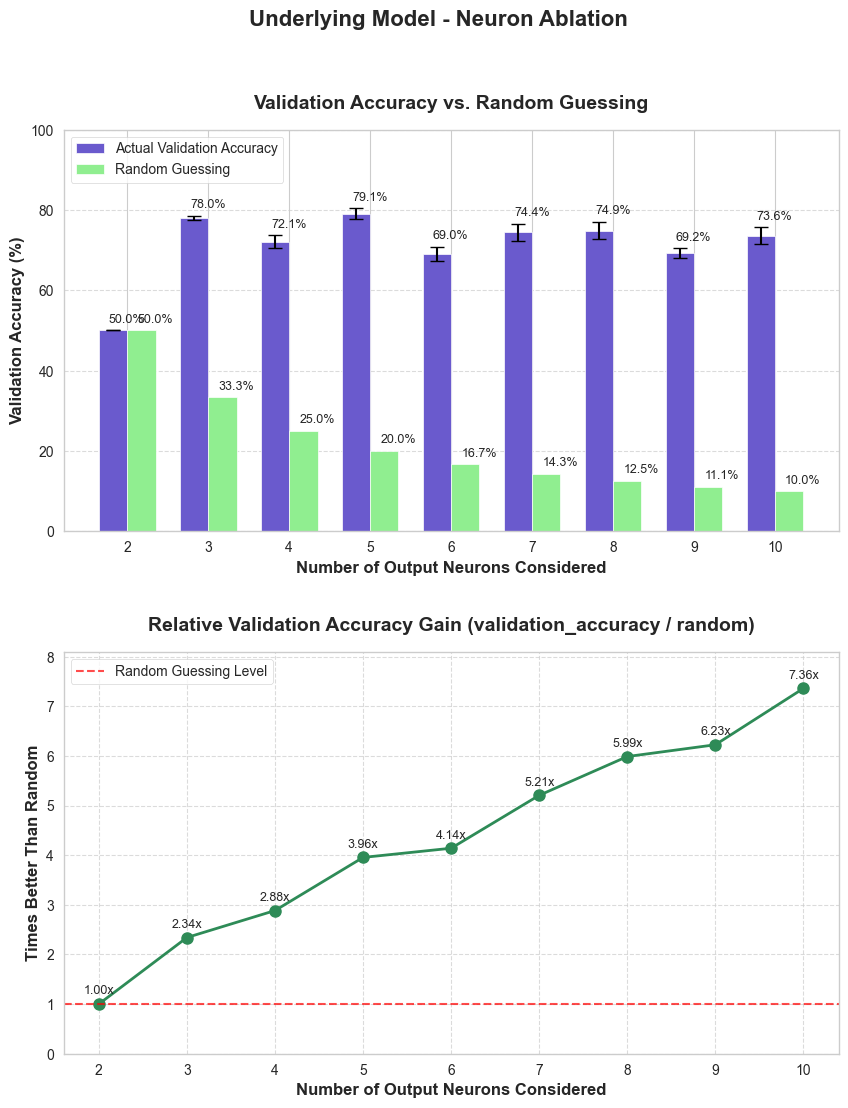

In [2]:


# Set style for better-looking plots
plt.style.use('ggplot')
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Load data
df = pd.read_csv('../data/mnist_ablation_results.csv')

# Group data by neuron count
neurons = list(range(2, 11))
results = []

for n in neurons:
    # Filter data for this neuron count
    neuron_data = df[df['num_neurons'] == n]
    
    # Calculate mean and standard deviation of validation accuracy
    acc_mean = neuron_data['valid_acc'].mean()
    acc_std = neuron_data['valid_acc'].std(ddof=1)  # Using sample standard deviation
    
    # Print information for verification
    print(f"Neuron count {n}: Mean={acc_mean*100:.2f}%, SD={acc_std*100:.2f}% from {len(neuron_data)} samples")
    
    # Calculate random guessing validation accuracy
    random_guess = 1/n
    
    # Calculate gains over random guessing
    additive_gain = acc_mean - random_guess
    relative_gain = acc_mean / random_guess
    
    results.append({
        'neurons': n,
        'validation_accuracy': acc_mean * 100,  # Convert to percentage
        'std_dev': acc_std * 100,  # Convert to percentage
        'random_guess': random_guess * 100,  # Convert to percentage
        'additive_gain': additive_gain * 100,  # How many percentage points above random
        'relative_gain': relative_gain  # How many times better than random
    })

# Convert to DataFrame and sort by neuron count
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('neurons')

# Create a nice figure with 2 subplots in a grid
fig = plt.figure(figsize=(10, 12))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.3)

# Plot 1: Validation Accuracy vs Random Guessing
ax1 = plt.subplot(gs[0])

# Set width of bars
barWidth = 0.35
r1 = np.arange(len(neurons))
r2 = [x + barWidth for x in r1]

# Create grouped bars
ax1.bar(r1, results_df['validation_accuracy'], width=barWidth, color='#6A5ACD', 
       yerr=results_df['std_dev'], capsize=5, label='Actual Validation Accuracy')
ax1.bar(r2, results_df['random_guess'], width=barWidth, color='#90EE90', label='Random Guessing')

# Add labels and title
ax1.set_xlabel('Number of Output Neurons Considered', fontweight='bold')
ax1.set_ylabel('Validation Accuracy (%)', fontweight='bold')
ax1.set_title('Validation Accuracy vs. Random Guessing', fontweight='bold', pad=15)
ax1.set_xticks([r + barWidth/2 for r in range(len(neurons))])
ax1.set_xticklabels(neurons)
ax1.set_ylim(0, 100)

# Add gridlines
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend
ax1.legend(loc='upper left')

# Add value labels above bars
for i, v in enumerate(results_df['validation_accuracy']):
    ax1.text(i - 0.05, v + 2 + results_df['std_dev'].iloc[i], f"{v:.1f}%", fontsize=9)
for i, v in enumerate(results_df['random_guess']):
    ax1.text(i + barWidth - 0.05, v + 2, f"{v:.1f}%", fontsize=9)

# Plot 2: Relative Gain
ax2 = plt.subplot(gs[1])
ax2.plot(neurons, results_df['relative_gain'], 'o-', color='#2E8B57', linewidth=2, markersize=8)

# Add horizontal line at y=1 (random guessing performance)
ax2.axhline(y=1, color='r', linestyle='--', alpha=0.7, label='Random Guessing Level')

# Add labels and title
ax2.set_xlabel('Number of Output Neurons Considered', fontweight='bold')
ax2.set_ylabel('Times Better Than Random', fontweight='bold')
ax2.set_title('Relative Validation Accuracy Gain (validation_accuracy / random)', fontweight='bold', pad=15)
ax2.set_xticks(neurons)
ax2.set_ylim(0, results_df['relative_gain'].max() * 1.1)

# Add gridlines
ax2.grid(True, linestyle='--', alpha=0.7)

# Add value labels above points
for i, v in enumerate(results_df['relative_gain']):
    ax2.text(neurons[i], v + 0.2, f"{v:.2f}x", ha='center', fontsize=9)

# Add a legend
ax2.legend(loc='upper left')

# Add overall title
plt.suptitle('Underlying Model - Neuron Ablation', fontsize=16, fontweight='bold', y=0.98)

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.savefig('../images/fig4.png', dpi=300, bbox_inches='tight')
plt.show()

## Input-layer task

#### compute variance of validation set

In [23]:
import math
distances = []
for i in range(28):
    for j in range(28):
        dist = math.sqrt((i - 13.5)**2 + (j - 13.5)**2)
        max_dist = math.sqrt(13.5**2 + 13.5**2)
        distances.append(dist/max_dist)

# compute variance of distances to center
label_variance_val = np.var(distances)

### Plot R2 score based on mse and label variance

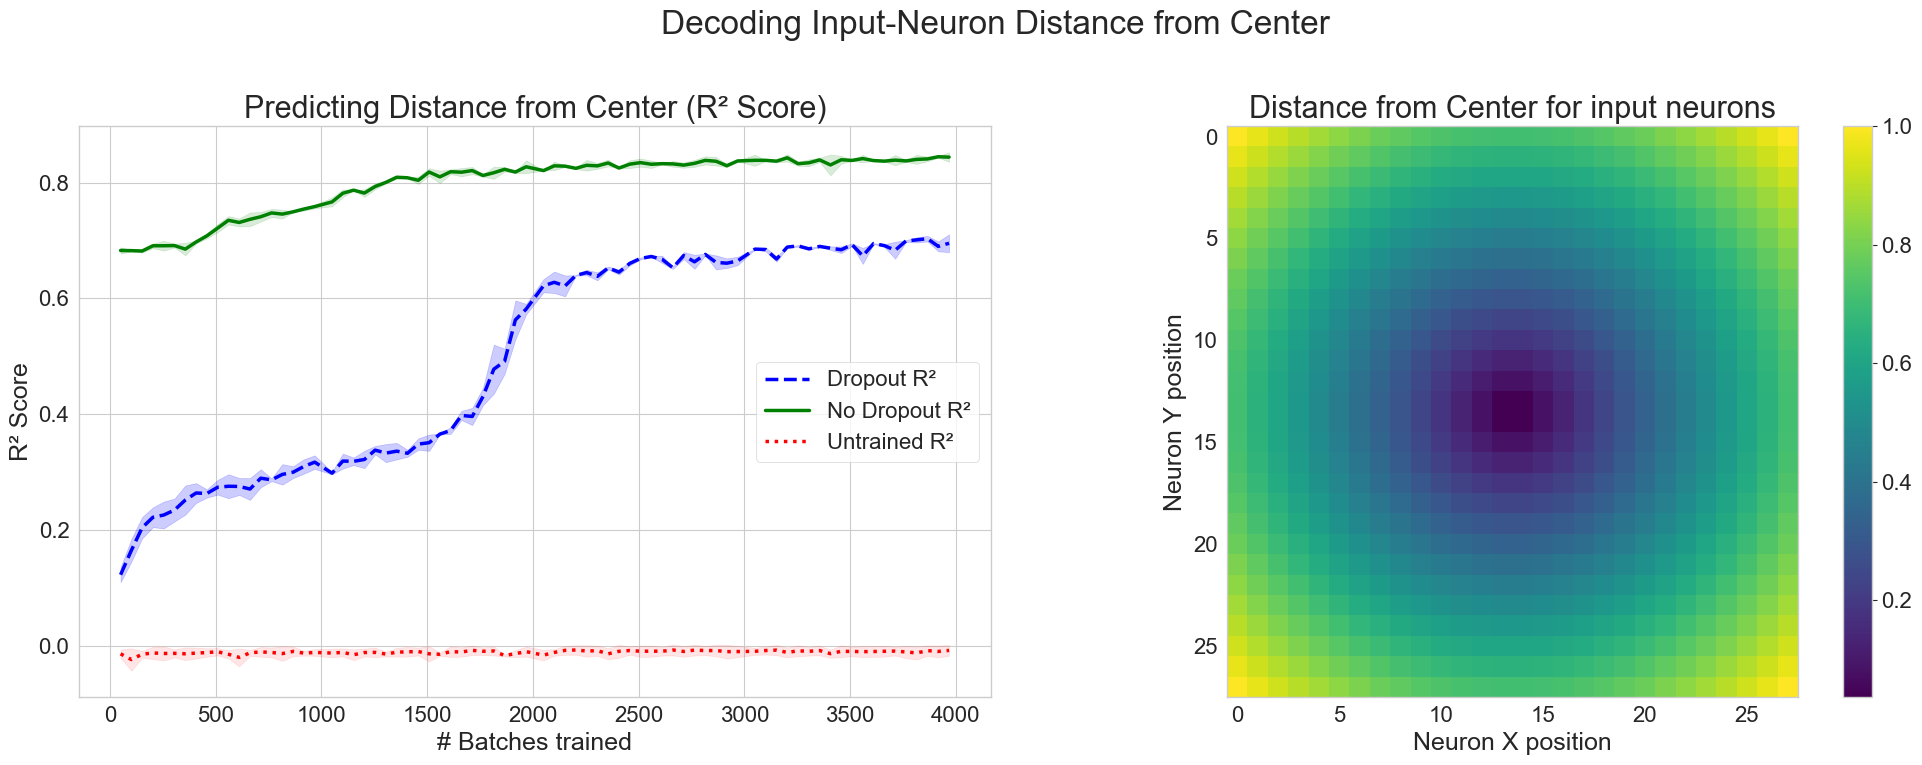

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume label_variance_val is defined earlier

# --- Define file identifiers and labels ---
data_sources = {
    'Dropout': 'dropout',
    'No Dropout': 'no-dropout',
    'Untrained': 'untrained'
}

# Define standard column names
column_names = ['step', 'mean_mse', 'max_mse', 'min_mse']

# --- Load data and calculate R2 scores in a loop ---
dataframes = {}
for label, file_id in data_sources.items():
    # Construct file path
    file_path = f'../data/input-pixels/{file_id}.csv'
    # Read CSV
    df = pd.read_csv(file_path)
    # Set column names
    df.columns = column_names
    # Calculate R2 scores
    df['mean_r2'] = 1.0 - (df['mean_mse'] / label_variance_val)
    df['min_r2'] = 1.0 - (df['min_mse'] / label_variance_val)
    df['max_r2'] = 1.0 - (df['max_mse'] / label_variance_val)
    # Store the processed dataframe
    dataframes[label] = df

# --- Plotting Code ---
sns.set_style("whitegrid")

# Define font sizes - increased
title_fontsize = 22
label_fontsize = 18
tick_fontsize = 16
legend_fontsize = 16

# Define plot colors and styles
colors = {'Dropout': 'blue', 'No Dropout': 'green', 'Untrained': 'red'}
linestyles = {'Dropout': '--', 'No Dropout': '-', 'Untrained': ':'}
alphas = {'Dropout': 0.2, 'No Dropout': 0.15, 'Untrained': 0.1}
linewidths = {'Dropout': 2.5, 'No Dropout': 2.5, 'Untrained': 2.5}

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Add a figure-level title
fig.suptitle("Decoding Input-Neuron Distance from Center", fontsize=title_fontsize+2, y=0.98)

# --- Plot 1: R² Score (Left subplot) ---
ax1.set_xlabel('# Batches trained', fontsize=label_fontsize)
ax1.set_ylabel('R² Score', fontsize=label_fontsize)

# Plot data for each dataframe
for label, df in dataframes.items():
    # Plot the mean line
    ax1.plot(df['step'], df['mean_r2'],
             label=f'{label} R²',
             color=colors[label],
             linestyle=linestyles[label],
             linewidth=linewidths[label])

    # Add confidence interval (STD) band
    ax1.fill_between(df['step'], df['min_r2'], df['max_r2'],
                     color=colors[label],
                     alpha=alphas[label],
                     label=f'{label} Std Dev Range')

# Set tick parameters
ax1.tick_params(axis='y', labelsize=tick_fontsize)
ax1.tick_params(axis='x', labelsize=tick_fontsize)
ax1.set_title('Predicting Distance from Center (R² Score)', fontsize=title_fontsize)



# --- Plot 2: Distance from Center (Right subplot) ---
# Create distance map
distances = []
for i in range(28):
    for j in range(28):
        dist = math.sqrt((i - 13.5)**2 + (j - 13.5)**2)
        max_dist = math.sqrt(13.5**2 + 13.5**2)
        distances.append(dist/max_dist)

# Display pixel map
pixel_map = np.zeros((28, 28), dtype=float)
for i, value in enumerate(distances):
    x, y = idx2xy(i, width=28)
    pixel_map[y, x] = value

# Remove grid lines from the right plot
ax2.grid(False)

im = ax2.imshow(pixel_map, cmap='viridis', interpolation='nearest')
cbar = plt.colorbar(im, ax=ax2)
cbar.ax.tick_params(labelsize=tick_fontsize)
ax2.set_title('Distance from Center for input neurons', fontsize=title_fontsize)
ax2.set_xlabel('Neuron X position', fontsize=label_fontsize)
ax2.set_ylabel('Neuron Y position', fontsize=label_fontsize)
ax2.tick_params(axis='both', labelsize=tick_fontsize)

# Add Legend to the first subplot
handles, labels = ax1.get_legend_handles_labels()
mean_handles = [h for h, l in zip(handles, labels) if 'R²' in l]
mean_labels = [l for l in labels if 'R²' in l]
ax1.legend(mean_handles, mean_labels, loc='best', fontsize=legend_fontsize)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()
